In [1]:
import string # for string manipulation operations
import re # for regular expression operations n.

import pandas as pd #for data manipulation and analysis
import numpy as np #for numerical computing
import seaborn as sns #for data visualization
import matplotlib.pyplot as plt #for data visualization

from collections import Counter #for counting occurrences of elements in a list or other iterable
from typing import Dict, Text #for declaring data types in a function or module
from ast import literal_eval #for evaluating strings as code
from datetime import datetime #for working with dates and times
from sklearn.preprocessing import MinMaxScaler #for feature scaling
import random #To generate random numbers to select random movies for user to rate
import io
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
credits = pd.read_csv('/content/drive/My Drive/datasets/credits.csv')
keywords = pd.read_csv('/content/drive/My Drive/datasets/keywords.csv')
movies = pd.read_csv('/content/drive/My Drive/datasets/movies_metadata.csv').\
                     drop(['belongs_to_collection', 'homepage', 'imdb_id', 'poster_path', 'status', 'title', 'video'], axis=1).drop([19730, 29503, 35587])


movies['id'] = movies['id'].astype('int64')

df = movies.merge(keywords, on='id').\
    merge(credits, on='id')

df['original_language'] = df['original_language'].fillna('')
df['runtime'] = df['runtime'].fillna(0)
df['tagline'] = df['tagline'].fillna('')

df.dropna(inplace=True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45558 entries, 0 to 46627
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45558 non-null  object 
 1   budget                45558 non-null  object 
 2   genres                45558 non-null  object 
 3   id                    45558 non-null  int64  
 4   original_language     45558 non-null  object 
 5   original_title        45558 non-null  object 
 6   overview              45558 non-null  object 
 7   popularity            45558 non-null  object 
 8   production_companies  45558 non-null  object 
 9   production_countries  45558 non-null  object 
 10  release_date          45558 non-null  object 
 11  revenue               45558 non-null  float64
 12  runtime               45558 non-null  float64
 13  spoken_languages      45558 non-null  object 
 14  tagline               45558 non-null  object 
 15  vote_average          45

In [5]:
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,False,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [4]:
# Check for unique values in the 'adult' column
df['adult'] = df['adult'].map({'True': 1, 'False': 0}) #convert adult from "T"/"F" to 1/0
df['budget'] = df['budget'].astype(np.float64)
df['popularity'] = df['popularity'].astype(np.float64)



df.head()


,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,0,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45558 entries, 0 to 46627
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   adult                 45558 non-null  int64  
 1   budget                45558 non-null  float64
 2   genres                45558 non-null  object 
 3   id                    45558 non-null  int64  
 4   original_language     45558 non-null  object 
 5   original_title        45558 non-null  object 
 6   overview              45558 non-null  object 
 7   popularity            45558 non-null  float64
 8   production_companies  45558 non-null  object 
 9   production_countries  45558 non-null  object 
 10  release_date          45558 non-null  object 
 11  revenue               45558 non-null  float64
 12  runtime               45558 non-null  float64
 13  spoken_languages      45558 non-null  object 
 14  tagline               45558 non-null  object 
 15  vote_average          45

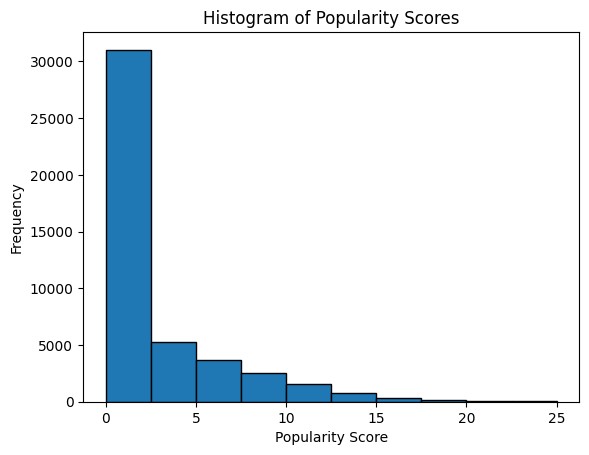

In [16]:

plt.hist(df['popularity'], bins=10, range=(0, 25), edgecolor='black')
plt.xlabel('Popularity Score')
plt.ylabel('Frequency')
plt.title('Histogram of Popularity Scores')
plt.show()



The histogram reveals significant insights about the distribution of popularity scores:

Skewed Distribution: The data is heavily skewed to the right. Most scores lie between 0 and 5, with the highest frequency in the 0-2.5 bin.

Gradual Decline: After the first bin, the frequency decreases steadily across the subsequent bins, highlighting that items with higher popularity scores become progressively fewer.

Rare High Scores: Very few items have scores greater than 10, and those beyond 15 are even rarer.

In [17]:
df["production_countries"].unique()

array(["[{'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       "[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",
       ...,
       "[{'iso_3166_1': 'PL', 'name': 'Poland'}, {'iso_3166_1': 'CZ', 'name': 'Czech Republic'}, {'iso_3166_1': 'SK', 'name': 'Slovakia'}]",
       "[{'iso_3166_1': 'CU', 'name': 'Cuba'}, {'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'ES', 'name': 'Spain'}]",
       "[{'iso_3166_1': 'EG', 'name': 'Egypt'}, {'iso_3166_1': 'IT', 'name': 'Italy'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]"],
      dtype=object)

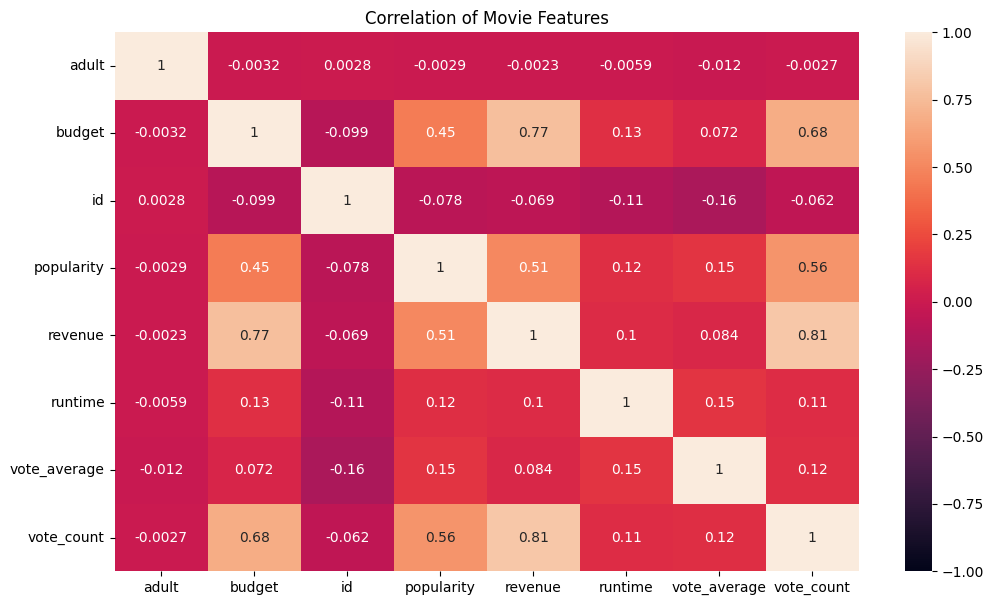

In [18]:
# plt.figure(figsize=(12, 7))
# sns.heatmap(movies.corr(), annot = True, vmin = -1, vmax = 1)
# plt.show()


# plt.figure(figsize=(12,7))
# plt.title('Correlation of Movie Features\n', fontsize=18, weight=600, color='#333d29')
# sns.heatmap(df.corr(), annot=True,vmin = -1, vmax = 1)
# plt.show()
numeric_df = df.select_dtypes(include=[np.number])  # This selects only the numeric columns
correlation_matrix = numeric_df.corr()  # Compute the correlation matrix for numeric columns only

# Now you can create a heatmap
plt.figure(figsize=(12,7))
sns.heatmap(correlation_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation of Movie Features')
plt.show()

Looking at your heatmap, here are a few deductions:

Budget and Revenue: There is a relatively strong positive correlation (0.77) between budget and revenue. This suggests that movies with higher budgets tend to generate higher revenues.
Popularity and Revenue/Vote Count: Both popularity and vote_count have a moderate positive correlation with revenue (0.51 and 0.81 respectively), indicating that more popular movies, or those with more votes, generally bring in more revenue.
Budget and Vote Count: There's a moderate positive correlation (0.68) between budget and vote_count, which could imply that movies with larger budgets tend to get more votes, possibly due to more extensive marketing or higher production values that attract viewers.

In [11]:
df.head()

,adult,budget,genres,id,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,vote_average,vote_count,keywords,cast,crew
0,0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",,7.7,5415.0,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,...","[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,0,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,6.9,2413.0,"[{'id': 10090, 'name': 'board game'}, {'id': 1...","[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,0,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,6.5,92.0,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392...","[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,0,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,6.1,34.0,"[{'id': 818, 'name': 'based on novel'}, {'id':...","[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,0,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,5.7,173.0,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n...","[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


In [12]:
numeric_df.head()

,adult,budget,id,popularity,revenue,runtime,vote_average,vote_count
0,0,30000000.0,862,21.946943,373554033.0,81.0,7.7,5415.0
1,0,65000000.0,8844,17.015539,262797249.0,104.0,6.9,2413.0
2,0,0.0,15602,11.712900,0.0,101.0,6.5,92.0
3,0,16000000.0,31357,3.859495,81452156.0,127.0,6.1,34.0
4,0,0.0,11862,8.387519,76578911.0,106.0,5.7,173.0


In [19]:
numeric_df.drop(['id'], axis=1, inplace=True)



In [14]:
numeric_df.head()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count
0,0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0
1,0,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0
2,0,0.0,11.712900,0.0,101.0,6.5,92.0
3,0,16000000.0,3.859495,81452156.0,127.0,6.1,34.0
4,0,0.0,8.387519,76578911.0,106.0,5.7,173.0


In [15]:
# df_transformed.isnull().sum()


In [20]:
df["release_year"] = df["release_date"].apply(lambda x : int(x[:4]))
df["release_month"] = df["release_date"].apply(lambda x : x[5:7])
df = df[df["release_month"]!= ""]
df["release_month"] = df["release_month"].apply(lambda x : int())
df.drop("release_date",axis=1,inplace=True)
numeric_df = pd.concat([numeric_df, df[['release_year', 'release_month']]], axis=1)
numeric_df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 45558 entries, 0 to 46627
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adult          45558 non-null  int64  
 1   budget         45558 non-null  float64
 2   popularity     45558 non-null  float64
 3   revenue        45558 non-null  float64
 4   runtime        45558 non-null  float64
 5   vote_average   45558 non-null  float64
 6   vote_count     45558 non-null  float64
 7   release_year   45558 non-null  int64  
 8   release_month  45558 non-null  int64  
dtypes: float64(6), int64(3)
memory usage: 4.5 MB


In [21]:
mean_value = numeric_df['popularity'].mean()
print(mean_value)

2.949126321699811


In [22]:
def label_encoder(row):
    if row["popularity"] > 4:
        return 1
    else:
        return 0

In [26]:
numeric_df["label"] = numeric_df.apply(lambda row: label_encoder(row), axis=1)
numeric_df.head(3)

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,label
0,0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,1995,0,1
1,0,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,1995,0,1
2,0,0.0,11.712900,0.0,101.0,6.5,92.0,1995,0,1


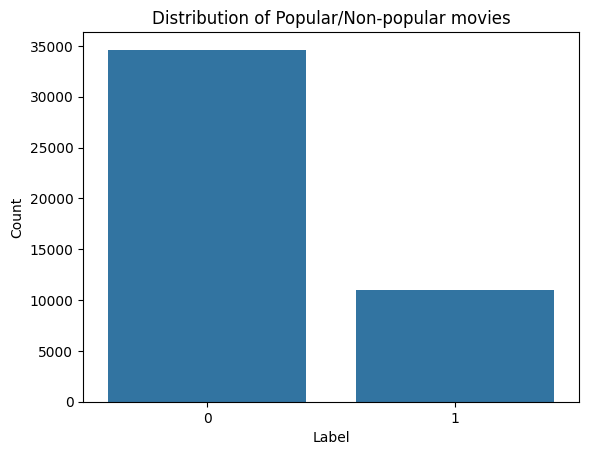

In [28]:
sns.countplot(data=numeric_df, x='label')
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Popular/Non-popular movies')
plt.show()

In [20]:
numeric_df.head()

,adult,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,release_month,label
0,0,30000000.0,21.946943,373554033.0,81.0,7.7,5415.0,1995,0,1
1,0,65000000.0,17.015539,262797249.0,104.0,6.9,2413.0,1995,0,1
2,0,0.0,11.712900,0.0,101.0,6.5,92.0,1995,0,1
3,0,16000000.0,3.859495,81452156.0,127.0,6.1,34.0,1995,0,0
4,0,0.0,8.387519,76578911.0,106.0,5.7,173.0,1995,0,1


In [21]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45558 entries, 0 to 46627
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   adult          45558 non-null  int64  
 1   budget         45558 non-null  float64
 2   popularity     45558 non-null  float64
 3   revenue        45558 non-null  float64
 4   runtime        45558 non-null  float64
 5   vote_average   45558 non-null  float64
 6   vote_count     45558 non-null  float64
 7   release_year   45558 non-null  int64  
 8   release_month  45558 non-null  int64  
 9   label          45558 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 4.8 MB


In [22]:

X = numeric_df.drop("label",axis=1)
y = numeric_df["label"]

from sklearn.model_selection import train_test_split

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(36446, 9)
(9112, 9)
(36446,)
(9112,)


In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, silhouette_score
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [24]:
# Initialize the KNN classifier with a certain number of neighbors, k
from sklearn.neighbors import KNeighborsClassifier
k = 2  # Example value; you may need to tune this based on your specific dataset
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate the accuracy of the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")

# Print out the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print out a detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.9839771729587358
Confusion Matrix:
[[6893   16]
 [ 130 2073]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6909
           1       0.99      0.94      0.97      2203

    accuracy                           0.98      9112
   macro avg       0.99      0.97      0.98      9112
weighted avg       0.98      0.98      0.98      9112



In [ ]:
# We'll test k values from 1 to 50
k_values = range(1, 50)
train_errors = []
val_errors = []

# Split your training data into a smaller training set and a validation set to measure error rates
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Loop over the values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sub, y_train_sub)

    # Training error
    y_train_pred = knn.predict(X_train_sub)
    train_accuracy = accuracy_score(y_train_sub, y_train_pred)
    train_errors.append(1 - train_accuracy)

    # Validation error
    y_val_pred = knn.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    val_errors.append(1 - val_accuracy)

# Plot the training and validation error as a function of the complexity
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_errors, label='Training Error', marker='o')
plt.plot(k_values, val_errors, label='Validation Error', marker='o')

# Highlight the best k value for validation error
best_k = k_values[np.argmin(val_errors)]
best_val_error = min(val_errors)
plt.scatter(best_k, best_val_error, color='red', zorder=5)
plt.title('Bias-Variance Tradeoff')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Best k = {best_k}')
plt.xlabel('k value (Model Complexity)')
plt.ylabel('Error rate')
plt.gca().invert_xaxis()  # Invert the x-axis so that the highest complexity (1/k) is on the left
plt.legend()
plt.show()

# Print out the best k value
print(f"The best k value is {best_k}")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

best_k = range(1, 50)[error_rate.index(min(error_rate))]
print(f"The least error rate is with k = {best_k}")

# Set the size of the plot
plt.figure(figsize=(15, 10))

# Plot the error rate
plt.plot(range(1, 50), error_rate, marker='o', markersize=9)

# Add a title
plt.title('Error Rate vs. K Value')

# Label the x-axis and y-axis
plt.xlabel('K Value')
plt.ylabel('Error Rate')

# Show grid
plt.grid(True)

# Display the plot
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score# Choose the number of folds for k-fold cross-validation
num_folds = 10
# Create a dictionary to store the average cross-validation scores for each k
cross_val_scores_mean = {}

# Test different values of k for KNN
for k in range(1, 50):
    # Initialize KNeighborsClassifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)

    # Perform k-fold cross-validation
    scores = cross_val_score(knn, X, y, cv=num_folds, scoring='accuracy')

    # Compute the mean accuracy and store it
    cross_val_scores_mean[k] = scores.mean()

# Find the key (k value) with the highest mean accuracy
best_k = max(cross_val_scores_mean, key=cross_val_scores_mean.get)

print(f"The best k value is {best_k} with a cross-validated accuracy of {cross_val_scores_mean[best_k]}")

# Optionally, you can plot the results to see the trend
import matplotlib.pyplot as plt

# Plot the mean accuracy scores for each k value
plt.figure(figsize=(15, 10))
plt.plot(list(cross_val_scores_mean.keys()), list(cross_val_scores_mean.values()), marker='o', linestyle='-')
plt.xlabel('k value')
plt.ylabel('Mean Cross-Validated Accuracy')
plt.title('K-Value vs. Cross-Validated Accuracy')
plt.grid(True)
plt.show()

In [ ]:

from sklearn.metrics import accuracy_score


# Split training data into a smaller training set and a validation set
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

train_accuracies = []
val_accuracies = []
k_values = range(1, 50)  # Test fewer values for k

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_sub, y_train_sub)

    # Calculate accuracy on the smaller training set and the validation set
    train_acc = accuracy_score(y_train_sub, knn.predict(X_train_sub))
    val_acc = accuracy_score(y_val, knn.predict(X_val))

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)

# Plotting the training and validation accuracies
plt.plot(k_values, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(k_values, val_accuracies, label='Validation Accuracy', marker='o')
plt.title('Training vs. Validation Accuracy for Different k Values')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

# Plot the elbow graph

plt.plot(range(1, 20), error_rate, color='blue', linestyle='dashed', marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors: K')
plt.ylabel('Error Rate')

# This additional code helps in identifying the elbow point visually
# Find the k value with the minimum error rate
k_elbow = range(1, 50)[error_rates.index(min(error_rates))]

plt.axvline(x=k_elbow, color='red', linestyle='--')
plt.annotate('Elbow Point', xy=(k_elbow, min(error_rates)), xytext=(k_elbow, min(error_rates) + 0.01),
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

# Printing the k value at the elbow point
print(f"The elbow is located at k={k_elbow}")


In [ ]:
# Initialize the KNN classifier with a certain number of neighbors, k
from sklearn.neighbors import KNeighborsClassifier
k = 5  # Example value; you may need to tune this based on your specific dataset
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

# Display results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:

k = 19  # Example value; you may need to tune this based on your specific dataset
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

# Display results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
k = 3  # Example value; you may need to tune this based on your specific dataset
knn = KNeighborsClassifier(n_neighbors=k)

# Train the KNN
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

# Display results
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import GridSearchCV

# Set up the grid of parameters to search
param_grid = {'n_neighbors': range(1, 50)}  # 50 cause my dataset is large

# Initialize the grid search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')

# Perform the grid search on the training data
grid_search.fit(X_train, y_train)

# Get the best number of neighbors
best_k = grid_search.best_params_['n_neighbors']

# Extract the mean test scores and mean train scores
mean_test_scores = grid_search.cv_results_['mean_test_score']
mean_train_scores = grid_search.cv_results_['mean_train_score']

print(f"The best number of neighbors is {best_k}")


In [ ]:
mean_scores = grid_search.cv_results_['mean_test_score']
k_values = list(range(1, 50))

plt.plot(k_values, mean_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('K Value vs. Validation Score')
plt.show()

In [ ]:

# Plot accuracy vs k value
plt.figure(figsize=(10, 4))
plt.plot(range(1, 50), mean_test_scores, label='Mean Test Score (accuracy)', marker='o')
plt.plot(range(1, 50), mean_train_scores, label='Mean Train Score (accuracy)', marker='o', linestyle='--')
plt.axvline(x=best_k, color='k', linestyle='--', label='Best k')
plt.title('Accuracy Score vs. K Value')
plt.xlabel('Number of Neighbors: k')
plt.ylabel('Accuracy Score')
plt.legend()
plt.show()

# # Plot error rate vs k value
# plt.figure(figsize=(10, 4))
# plt.plot(range(1, 50), mean_error_rates, label='Mean Error Rate', marker='o')
# plt.axvline(x=best_k, color='k', linestyle='--', label='Best k')
# plt.title('Error Rate vs. K Value')
# plt.xlabel('Number of Neighbors: k')
# plt.ylabel('Error Rate')
# plt.legend()
# plt.show()

# # Overfitting or underfitting can be observed by comparing training and test scores
# # Ideally, both lines should be as close as possible while still maintaining a high accuracy
# plt.figure(figsize=(10, 4))
# plt.plot(range(1, 50), mean_train_scores, label='Mean Train Score', marker='o')
# plt.plot(range(1, 50), mean_test_scores, label='Mean Test Score', marker='o')
# plt.fill_between(range(1, 50), mean_train_scores, mean_test_scores, alpha=0.1, color='blue', label='Gap')
# plt.axvline(x=best_k, color='k', linestyle='--', label='Best k')
# plt.title('Train vs Test Scores to Detect Overfitting/Underfitting')
# plt.xlabel('Number of Neighbors: k')
# plt.ylabel('Score')
# plt.legend()
# plt.show()